# **Dimensionality Reduction:**

**Unsupervised learning** : learning without label (no prior knowledge about data)

One of the imp usecase of unsupervised learning is **Dimensionality Reduction.**

## **1. Principle Component Analysis (PCA):**
   *   Linear dimensionality reduction using *singular value decomposition* of the data to project it to a lower diemnsional space.
   *  Statistical procedure that utilise orthogonal transformation technology.
   *  Convert possible correlated features(predictors) into linear uncorrelated features (predictors) called as **principle components**.
   * no.of principle component <= no.of features.
   * First principle component explains the largest possible variance.Second principle component explains the 2nd largest possible variance and so on.
   * Each subsequent component has the highest variance subject to the restriction that it must be orthogonal to the preceding element.
   * A collection of components are called as vectors.
   * sensitive to scaling.

## **2. Linear Discriminant Analysis (LDA):**
  * Most commonly used as the dimensionality reduction technique in the preprocessing step of ML and Pattern recognition applications.
  * Goal is to project dataset into a lower dimensionality space with good class-saperablity in order to avoid overfitting (curse of dimensionality) and also reduce computational cost.
  * Locate the boundary around cluster of classes.
  * projects data points on a line.
  * A centroid will be located to each cluster or have a centre nearby.

### **Other Dimensionality reduction techniques:**
1. MultiDimensional Scaling (MDS)
2. Isomap (Isometric mapping)
3. t-distributed stochastic neighbor embedding (t-SNE)

## **Linear Algebra: Matrix Multiplication**  

In [45]:
a = [[1,2],[10,20]]

In [46]:
b = [[1,2],[100,200]]

In [47]:
import numpy as np

In [48]:
np.dot(a,b)

array([[ 201,  402],
       [2010, 4020]])

## **Linear PCA:**  

**Applications of PCA:**

>mostly used as a tool in exploratory data analysis and for making predictive models.

>used to visualize genetic distance and relatedness between populations.

> Data compression 

> Visualization

> noise filtering
 
>feature extraction.

**Methods in PCA:**

>Eigenvalue decomposition of a data covariance (or correlation) matrix.

>Singular value decomposition of a data matrix(after mean centering / normalizing the data matrix for each attribute)

**Output in PCA:**

>Component scores (factor scores or the transformed variable values)

>loadings (the weight)

In [49]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
sns.set()

In [50]:
r = np.random.RandomState(42)
x = np.dot(r.rand(2,2),r.randn(2,500)).T
x.shape

(500, 2)

In [51]:
x[:,0] = -x[:,0]

(-3.36000306145041, 3.3314115919910354, -2.881825799615855, 4.1556598184440166)

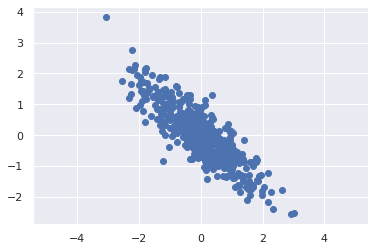

In [52]:
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')

### **Principle Component Identification:**

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components=2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
pca.components_

array([[-0.74062812,  0.67191517],
       [-0.67191517, -0.74062812]])

In [56]:
pca.explained_variance_

array([1.62123504, 0.12581594])

In [57]:
pca.explained_variance_ratio_

array([0.92798382, 0.07201618])

(-3.36000306145041, 3.3314115919910354, -2.881825799615855, 4.1556598184440166)

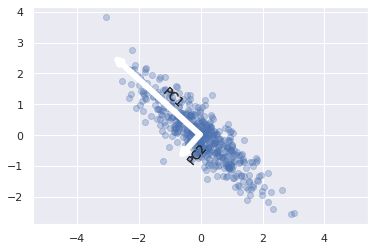

In [58]:
plt.scatter(x[:,0],x[:,1],alpha=0.3)

for k,v in zip(pca.explained_variance_,pca.components_):
  vec = v * 3 * np.sqrt(k)

  ax = plt.gca()
  arrow = dict(arrowstyle = '<-',
               linewidth = 6,
               shrinkA = 0,shrinkB = 0)
  ax.annotate('',pca.mean_,pca.mean_+vec,arrowprops = arrow)
  ax.text(-0.9,1.2,'PC1',ha = 'center',va = 'center',rotation = -42,size = 12)
  ax.text(-0.1,-0.6,'PC2',ha = 'center',va = 'center',rotation = 50,size = 12)
plt.axis('equal')

Analysis on plot:
> 2 -d principle components.

> Length denotes the significance.

> transformation from data axes to priciple axes ---> Affine transformation (composed of translation,rotation,uniform scaling)


## **Dimensionality Reduction with PCA:** 

In [59]:
pca = PCA(n_components=1)
pca.fit(x)
x_pca = pca.transform(x)

In [60]:
x.shape

(500, 2)

In [61]:
x_pca.shape

(500, 1)

(-3.9188024367345227, 3.358021086052184, -2.971613372818548, 4.159935417167954)

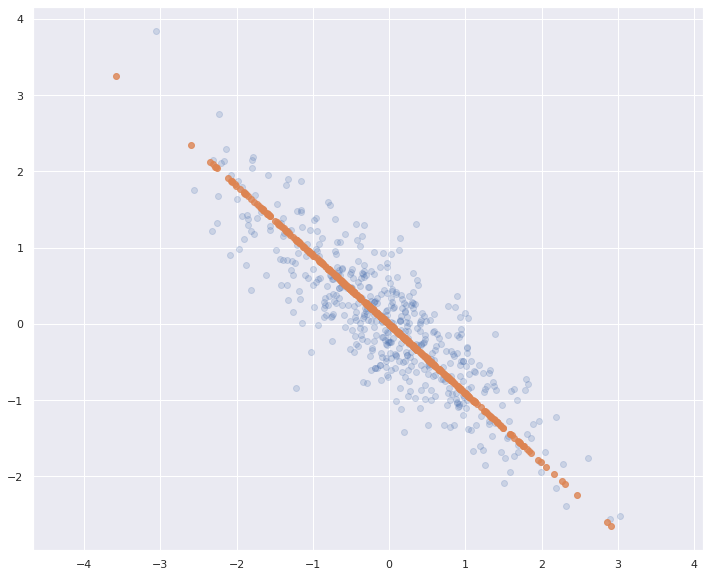

In [62]:
plt.figure(figsize=(12,10))
x_new = pca.inverse_transform(x_pca)
plt.scatter(x[:,0],x[:,1],alpha=0.2)
plt.scatter(x_new[:,0],x_new[:,1],alpha=0.8)
plt.axis('equal')

> The light blue dots are original data.

> orange line is PCA.